In [36]:
from tensorflow import keras
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 븐류
# from sklearn.neighbors import KNeighborsRegressor # 회귀- 예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re
from collections import Counter
from konlpy.tag import Okt
from konlpy.tag import Kkma
import operator
import matplotlib.pyplot as plt
from wordcloud import WordCloud

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic

In [37]:
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [38]:
train_input.shape

(60000, 28, 28)

In [39]:
# 표준화 작업
train_scaled = train_input/255.0
# train_scaled = train_scaled.reshape(-1,28*28) # flatten층에서 사이즈 그대로 적용(28,28)


In [40]:
train_scaled,val_scaled, train_target,val_target = train_test_split(
     train_scaled,train_target,test_size=0.2, random_state=42
)

In [41]:
# 머신러닝

In [42]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu')) #sigmoid
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

훈련세트 epochs = 20 훈련세트 정확도가 높아짐

검증세트를 가지고 정확도를 측정

In [51]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#  epochs 돌 때마다 loss,accuracy 값을 저장 
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target))


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9308 - loss: 0.1831 - val_accuracy: 0.8938 - val_loss: 0.3349
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9341 - loss: 0.1750 - val_accuracy: 0.8893 - val_loss: 0.3507
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9391 - loss: 0.1631 - val_accuracy: 0.8903 - val_loss: 0.3475
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9369 - loss: 0.1685 - val_accuracy: 0.8902 - val_loss: 0.3518
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9392 - loss: 0.1635 - val_accuracy: 0.8903 - val_loss: 0.3548
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9401 - loss: 0.1593 - val_accuracy: 0.8852 - val_loss: 0.3736
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9408 - loss: 0.1569 - val_accuracy: 0.8930 - val_loss: 0.3506
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9433 - loss: 0.1525 - 

In [53]:
# 총 4개 속송 -  train 세트 2개(accuracy, loss) , test세트 2개(val_accuracy, val_loss)
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

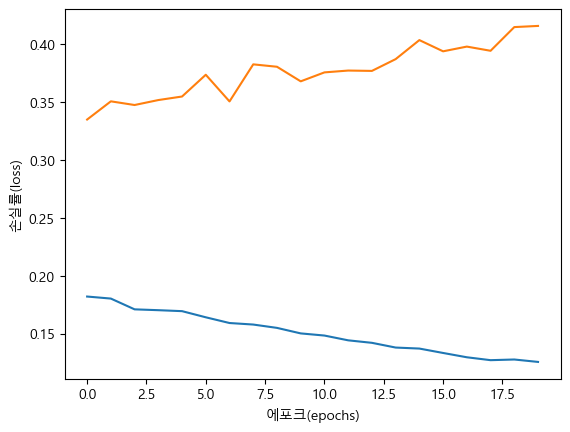

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
plt.savefig('m0529_03',dpi=300)
plt.show()

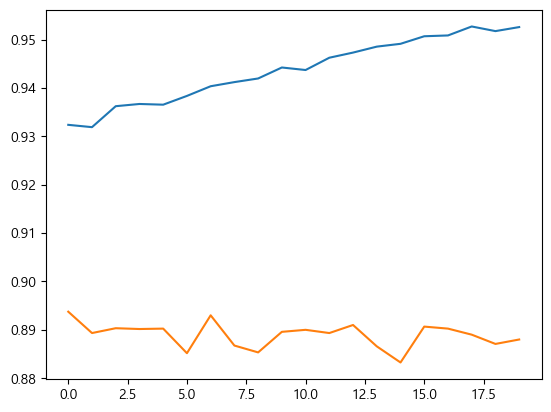

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [45]:
# history keys index를 확인
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [46]:
# 테스트 세트도 함께 검정 - history
# model.fit - loss.accuracy 정보를 리턴(history)

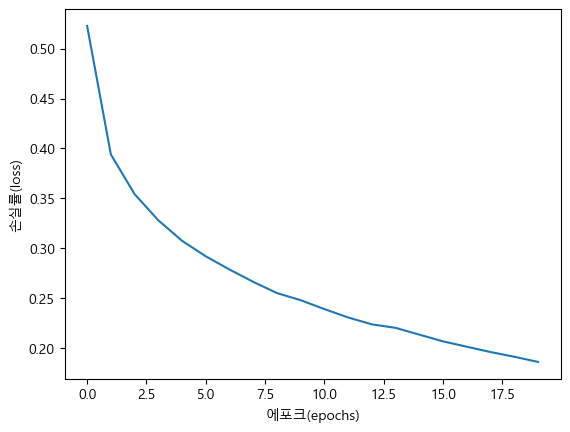

In [47]:
plt.plot(history.history['loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
plt.savefig('m0529_03',dpi=300)
plt.show()

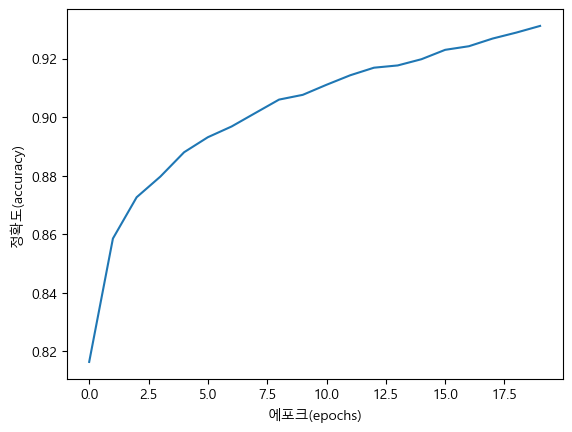

In [48]:
# 정확도 그래프
plt.plot(history.history['accuracy'])
plt.xlabel('에포크(epochs)')
plt.ylabel('정확도(accuracy)')
plt.savefig('m0529_03',dpi=300)
plt.show()

In [49]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.8859 - loss: 0.3354


[0.3344224691390991, 0.8862500190734863]

In [50]:
train_scaled.shape

(48000, 28, 28)